Boucle globale de lecture de vidéo


state= 0
    img_calibration
    obstacle detection
    start and goal
    global_nav
    
state = 1
    img_calibration
    detect Thymio
    astolfi ou local nav
    
    

In [7]:
#lancer la communication asynchrone avec thymio
from tdmclient import ClientAsync, aw
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

#vérifier d'avoir installer pyserial

CancelledError: 

# Initialisation

In [1]:
#check each import if it's really necessary
import cv2 
import time
import numpy as np
from PIL import Image 
import math
import matplotlib
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

#import from global control
#import from glocal + control
import pyvisgraph as vg
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Polygon, Point, LineString
import time

In [2]:
import Vision as vis
import Global as glob
import control as ctrl
import local_nav as local

frame 0
frame 1
frame 2
frame 3
frame 4


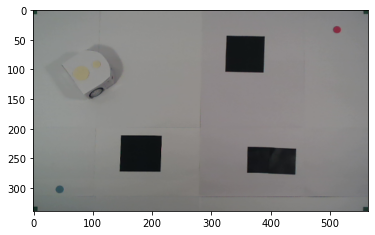

In [16]:
#pour le test utilise une image mais en vrai relier à la caméra et temps réel

cap=cv2.VideoCapture(1,cv2.CAP_DSHOW)

for i in range (5):
    _, frame = cap.read()
    time.sleep(1)
    print("frame {}".format(i))

cap.release()


#img_final= cv2.flip(img_final, 0)
img_final2 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
img=vis.img_calibration(img_final2)
#cv2.imwrite('warpped.png', zzz)
plt.figure()
plt.imshow(img)
plt.show()



In [17]:
#obstacle detection
polygons=vis.obstacle_detection(img)
#Start and goal detection
start=vis.detectCircle(img,'start')
goal=vis.detectCircle(img,'goal')

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 501.26it/s]


Visibility graph points:  [[Point(360.80, 230.80), Point(360.80, 275.20), Point(443.20, 276.20), Point(443.20, 232.80)], [Point(146.80, 211.80), Point(146.80, 273.20), Point(215.20, 272.20), Point(216.20, 210.80)], [Point(326.81, 41.79), Point(322.79, 103.19), Point(387.19, 106.21), Point(391.21, 44.81)]] 

Shortest path distance: 544.5208985630686 

0    POLYGON ((360.800 230.795, 360.800 275.198, 44...
1    POLYGON ((146.800 211.803, 146.800 273.203, 21...
2    POLYGON ((326.813 41.791, 322.787 103.190, 387...
0                               POINT (45.500 302.500)
1                              POINT (146.800 211.803)
2                              POINT (387.187 106.209)
3                               POINT (513.500 33.000)
dtype: geometry 

path  0     POINT (45.500 302.500)
1    POINT (146.800 211.803)
2    POINT (387.187 106.209)
3     POINT (513.500 33.000)
dtype: geometry


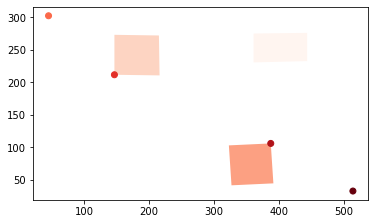

In [18]:
#plot the visibility graph

#a voir si on le met dedans
margin = 0.2
path=glob.global_pathplanning(start,goal,polygons,margin)


# Control and navigation loop

In [4]:
#cap=cv2.VideoCapture(0)

frame 0
frame 1
frame 2
frame 3
frame 4


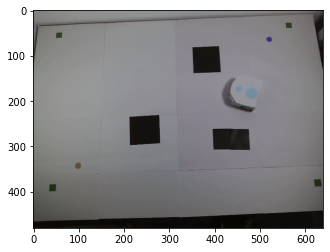

In [3]:
cap=cv2.VideoCapture(1,cv2.CAP_DSHOW)

for i in range (5):
    _, frame = cap.read()
    time.sleep(1)
    print("frame {}".format(i))

cap.release()
    
#frame=vis.img_calibration(frame)
    
plt.figure()
plt.imshow(frame)
plt.show()

In [4]:
#img_final = cv2.imread(frame)
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#img= cv2.flip(img, 0)
final=vis.img_calibration(img)
plt.figure()
plt.imshow(final)
plt.show()

TypeError: img_calibration() missing 1 required positional argument: 'corner_coord'

In [3]:
def initialisation(pic):
    #obstacle detection
    polygons=vis.obstacle_detection(pic)
    #Start and goal detection
    start=vis.detectCircle(pic,'start')
    goal=vis.detectCircle(pic,'goal')
    init=[start,goal,polygons]
    return init


In [4]:
#convertir frame to real => mm/s vitesse et position

#coefficients for the Astolfi controller (distances in millimeter)
r=22
l=48 
kp=0.1  #2 #>0
ka=0.2  #must be > kp
kb=-0.0001 #<0

coeff_commtoreal=0,38

def astolfi(actual_pos, goal_pos, actual_angle, node):
    delta=np.subtract(goal_pos,actual_pos)
    pho=np.sqrt(np.sum(np.square(delta)))
    alpha=-actual_angle + np.degrees(np.arctan2(delta[1],delta[0]))
    beta=-actual_angle-alpha
    v=kp*pho
    omega=ka*alpha+kb*beta
    right_speed=(l*omega+v)/r
    left_speed=(v-l*omega)/r
    left_speed=int(left_speed)
    right_speed=int(right_speed)
    set_motors(left_speed, right_speed, node)

In [5]:
def printGlobalPath(path, img):
    lineThickness = 3
    for i in range(0,len(path)-1):
        cv2.line(final, (round(path[i][0]), round(path[i][1])),(round(path[i+1][0]), round(path[i+1][1])), (0,255,0), lineThickness)

frame 0
frame 1
frame 2
frame 3
frame 4


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 117.90it/s]



Visibility graph points:  [[Point(368.80, 236.80), Point(367.80, 281.20), Point(451.18, 283.20), Point(455.22, 238.81)], [Point(249.21, 203.80), Point(178.81, 203.80), Point(176.79, 266.20), Point(246.19, 265.20)], [Point(339.80, 45.80), Point(338.80, 110.21), Point(404.19, 108.19), Point(406.21, 44.80)]] 

Shortest path distance: 552.5203722415971 

0    POLYGON ((368.805 236.795, 367.796 281.195, 45...
1    POLYGON ((249.210 203.800, 178.806 203.800, 17...
2    POLYGON ((339.803 45.803, 338.797 110.206, 404...
0                               POINT (58.500 306.500)
1                              POINT (178.806 203.800)
2                              POINT (404.194 108.194)
3                               POINT (534.000 34.000)
dtype: geometry 

path  0     POINT (58.500 306.500)
1    POINT (178.806 203.800)
2    POINT (404.194 108.194)
3     POINT (534.000 34.000)
dtype: geometry
[529.0, 286.5]
82.30441273102217
[528.6153564453125, 287.0]
81.2645843821547
[528.5985717773438, 287.3873

[528.9119262695312, 289.7673034667969]
81.61235928471903
[529.027099609375, 288.74188232421875]
79.36878144356591
[529.3983154296875, 287.7542419433594]
82.54634782234018
[528.5950317382812, 287.06610107421875]
81.08020638529511
[530.4031982421875, 288.30645751953125]
82.6469414642651
[528.7189331054688, 287.2385559082031]
81.30356852160308
[529.5, 285.72222900390625]
83.26559301505695
failure in identifying corners
[528.0925903320312, 287.0]
80.89467114159228
failure in identifying corners
[528.38232421875, 286.79412841796875]
81.49590255065165
failure in identifying corners
[529.0, 286.5]
81.57336422716308
failure in identifying corners
[528.7021484375, 286.31915283203125]
81.64234968285194
failure in identifying corners
[528.6341552734375, 286.81097412109375]
82.01021361768
failure in identifying corners
[528.6060180664062, 286.36175537109375]
80.50341181211019
failure in identifying corners
[528.5, 286.5]
80.86982351772131
failure in identifying corners
[528.629638671875, 288.0]
81

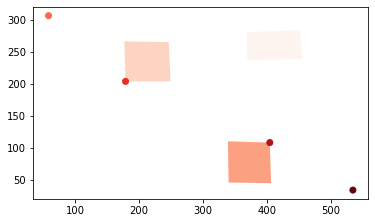

In [6]:
cap=cv2.VideoCapture(1,cv2.CAP_DSHOW)
for i in range (5):
    _, frame = cap.read()
    time.sleep(1)
    print("frame {}".format(i))

#cap.release()
#plt.figure()
#plt.imshow(frame)
#plt.show()

time.sleep(1)
state=0
margin = 0.2

while (cap.isOpened()):
    _, frame = cap.read()
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    #final=vis.img_calibration(img, corner_coord)
    #img= cv2.flip(img, 0)
    if(state==0):
        corner_coord=vis.find_corners(img)
        final=vis.img_calibration(img, corner_coord)
        init=initialisation(final)
        path=glob.global_pathplanning(init[0],init[1],init[2],margin)
        state=1
    if state==1:
        final=vis.img_calibration(img, corner_coord)
        pos_thym=vis.detectThymio(final)[0]
        angle_thym=vis.directionThymio(final)
        print(pos_thym)
        print(angle_thym)
        #y = [50,50]
        #ctrl.set_motors(y[0],y[1],node)
        #ctrl.astolfi(pos_thym,init[1],angle_thym,node)
        #print("sorti")
        #delta=np.subtract(path[1],thym[0])
        #pho=np.sqrt(np.sum(np.square(delta)))
        #print(pho)
        #ctrl.stopmotors(node)
        #if(pho < )
            #state=2
    if state==2:
        break
    vis.printGlobalPath(path, final)
    cv2.imshow("results", final)
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [6]:
ctrl.stopmotors(node)

In [19]:
print(init)

[[112.5, 369.5], [0, 0], [[(253, 285), (298, 291), (283, 374), (238, 368)], [(180, 161), (186, 213), (124, 224), (120, 171)], [(382, 139), (439, 144), (436, 199), (377, 193)]]]


In [7]:
# Navigation initialisation
checkp=1           # goal checkpoint
actual_angle=0     # angle to xy axis
y = [0,0]          # powers given to motor wheels

# FSM initialisation
state = 0          # States FSM 0=global nav, 1=local nav
obst = [0,0,0]     # measurements from left, middle, right prox sensors
obstThrL = 2500      # low obstacle threshold to switch state 1->0
obstThrL2 = 3000
obstThrH = 4000      # high obstacle threshold to switch state 0->1  

while True:
    
    # get the proximity sensors values and obstacle update
    prox_horizontal = ctrl.read_prox_sensors(node,client)
    obst = [prox_horizontal[0], prox_horizontal[2], prox_horizontal[4]]
    
    # update the state and speed motors values
    state = local.update_state(state,obstThrL,obstThrH, obst)
    y = ctrl.read_motors_speed(node,client)
    
    print("state", state)

    if state == 0:
        
        """
        # With positon estimation when vision and/or kalman ready
        
        actual,angle = getting_vis()
        pred_pos,pred_angle = kalman(actual, angle)
        
        actual_pos=pred_pos
        actual_angle=pred_angle
        
        if actual_pos == checkpoints[checkp]: # other option: if (actual_pos - checkpoints[checkp]) < error
            checkp=checkp+1
        goal_pos=checkpoints[checkp]
        
        y = ctrl.astolfi2(actual_pos, goal_pos, actual_angle, node)
        
        """
        y = [50,50]
        ctrl.set_motors(y[0],y[1],node)

    elif state == 1:
        print("obstacles values", obst)
        y = local.local_nav(prox_horizontal,y)
        print("y ",y)
        ctrl.set_motors(y[0],y[1],node)

ctrl.stopmotors(node)

NameError: name 'node' is not defined

In [5]:
ctrl.stopmotors(node)